In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mushroom Classification Project

[The file is from Kaggle](https://www.kaggle.com/uciml/mushroom-classification)

In [2]:
mushroom = pd.read_csv("mushrooms.csv")
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Data Dictionary

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Pandas Profiling Report

In [3]:
# from pandas_profiling import ProfileReport
# ProfileReport(mushroom)

## Data Exploration

In [4]:
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [5]:
mushroom['class'].replace({
    "e": 'edible',
    'p': 'poisonous'
}, inplace=True)
mushroom['class'].value_counts()

edible       4208
poisonous    3916
Name: class, dtype: int64

<AxesSubplot:>

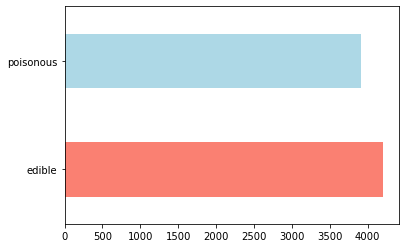

In [6]:
mushroom['class'].value_counts().plot(
    kind='barh', color=['salmon', 'lightblue'])

### Poisonous mushroom according to habitat

In [7]:
mushroom.habitat.replace('d', 'woods', inplace=True)
mushroom.habitat.value_counts()

woods    3148
g        2148
p        1144
l         832
u         368
m         292
w         192
Name: habitat, dtype: int64

In [8]:
mushroom.habitat.replace({
    "g": 'grasses',
    "p": 'paths',
    "l": 'leaves',
    "u": 'urban',
    "m": 'meadows',
    "w": 'waste'
}, inplace=True)
mushroom.habitat.value_counts()

woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: habitat, dtype: int64

<AxesSubplot:>

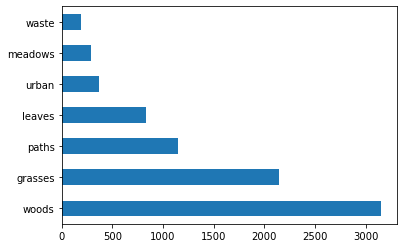

In [9]:
mushroom.habitat.value_counts().plot(kind='barh')

In [10]:
pd.crosstab(mushroom['class'], mushroom.habitat)

habitat,grasses,leaves,meadows,paths,urban,waste,woods
class,,,,,,,
edible,1408,240,256,136,96,192,1880
poisonous,740,592,36,1008,272,0,1268


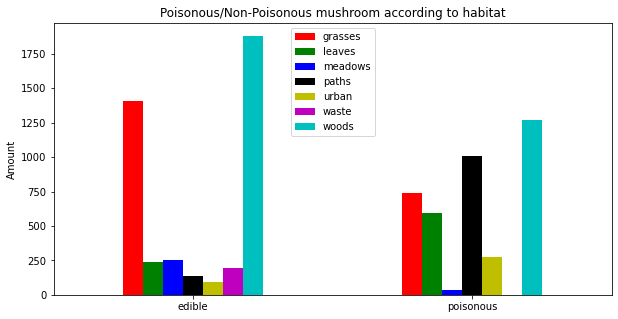

In [11]:
my_colors = 'rgbkymc'

pd.crosstab(mushroom['class'], mushroom.habitat).plot(
    kind='bar', color=my_colors, figsize=(10, 5))
plt.title('Poisonous/Non-Poisonous mushroom according to habitat')
plt.ylabel('Amount')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.show()

### Poisonous mushroom according to population

In [12]:
mushroom.population.value_counts()

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

In [13]:
mushroom.population.replace({
    'v': 'several',
    "y": 'solitary',
    "s": 'scattered',
    "n": 'numerous',
    "a": 'abundant',
    "c": 'clustered'
}, inplace=True)
mushroom.population.value_counts()

several      4040
solitary     1712
scattered    1248
numerous      400
abundant      384
clustered     340
Name: population, dtype: int64

In [14]:
pd.crosstab(mushroom['class'], mushroom.population)

population,abundant,clustered,numerous,scattered,several,solitary
class,,,,,,
edible,384,288,400,880,1192,1064
poisonous,0,52,0,368,2848,648


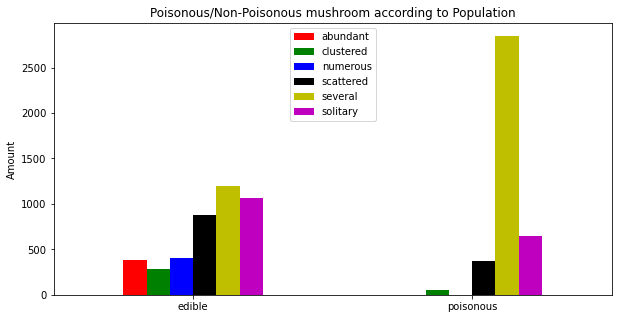

In [15]:
pd.crosstab(mushroom['class'], mushroom.population).plot(
    kind='bar', color=my_colors, figsize=(10, 5))
plt.title('Poisonous/Non-Poisonous mushroom according to Population')
plt.ylabel('Amount')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.show()

### Poisonous mushroom according to cap-color

In [16]:
mushroom['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

In [17]:
mushroom['cap-color'].replace({"n": 'brown',
                               "g": 'grey',
                               "e": 'red',
                               "y": 'yellow',
                               "w": 'white',
                               "b": 'buff',
                               "p": 'pink',
                               "c": 'cinnamon',
                               "u": 'purple',
                               "r": 'green'}, inplace=True)
mushroom['cap-color'].value_counts()

brown       2284
grey        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
green         16
purple        16
Name: cap-color, dtype: int64

In [18]:
pd.crosstab(mushroom['class'], mushroom['cap-color'])

cap-color,brown,buff,cinnamon,green,grey,pink,purple,red,white,yellow
class,,,,,,,,,,
edible,1264,48,32,16,1032,56,16,624,720,400
poisonous,1020,120,12,0,808,88,0,876,320,672


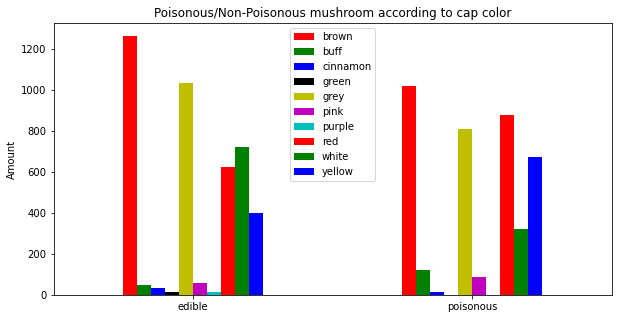

In [19]:
pd.crosstab(mushroom['class'], mushroom['cap-color']
            ).plot(kind='bar', color=my_colors, figsize=(10, 5))
plt.title('Poisonous/Non-Poisonous mushroom according to cap color')
plt.ylabel('Amount')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.show()

In [20]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [21]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,brown,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,scattered,urban
1,edible,x,s,yellow,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,numerous,grasses
2,edible,b,s,white,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,numerous,meadows
3,poisonous,x,y,white,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,scattered,urban
4,edible,x,s,grey,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,k,s,brown,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,clustered,leaves
8120,edible,x,s,brown,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,several,leaves
8121,edible,f,s,brown,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,clustered,leaves
8122,poisonous,k,y,brown,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,several,leaves


### Poisonous mushroom according to odor

In [22]:
mushroom.odor.value_counts()

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [23]:
mushroom.odor.replace({"n": 'none',
                       "f": 'foul',
                       "y": 'fishy',
                       "s": 'spicy',
                       "a": 'almond',
                       "l": 'anise',
                       "p": 'pungent',
                       "c": 'creosote',
                       "m": 'musty'}, inplace=True)
mushroom.odor.value_counts()

none        3528
foul        2160
fishy        576
spicy        576
anise        400
almond       400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64

In [24]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,x,s,brown,t,pungent,f,c,n,k,...,s,w,w,p,w,o,p,k,scattered,urban
1,edible,x,s,yellow,t,almond,f,c,b,k,...,s,w,w,p,w,o,p,n,numerous,grasses
2,edible,b,s,white,t,anise,f,c,b,n,...,s,w,w,p,w,o,p,n,numerous,meadows
3,poisonous,x,y,white,t,pungent,f,c,n,n,...,s,w,w,p,w,o,p,k,scattered,urban
4,edible,x,s,grey,f,none,f,w,b,k,...,s,w,w,p,w,o,e,n,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,k,s,brown,f,none,a,c,b,y,...,s,o,o,p,o,o,p,b,clustered,leaves
8120,edible,x,s,brown,f,none,a,c,b,y,...,s,o,o,p,n,o,p,b,several,leaves
8121,edible,f,s,brown,f,none,a,c,b,n,...,s,o,o,p,o,o,p,b,clustered,leaves
8122,poisonous,k,y,brown,f,fishy,f,c,n,b,...,k,w,w,p,w,o,e,w,several,leaves


In [25]:
pd.crosstab(mushroom['class'], mushroom.odor)

odor,almond,anise,creosote,fishy,foul,musty,none,pungent,spicy
class,,,,,,,,,
edible,400,400,0,0,0,0,3408,0,0
poisonous,0,0,192,576,2160,36,120,256,576


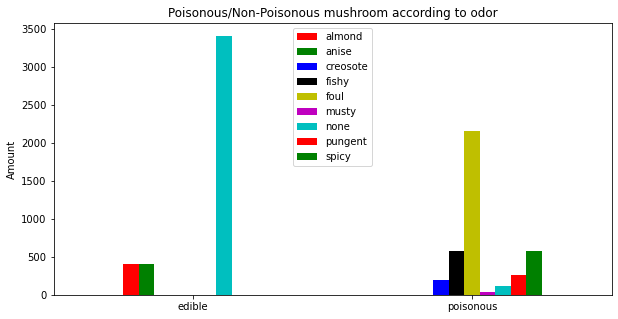

In [26]:
pd.crosstab(mushroom['class'], mushroom.odor).plot(
    kind='bar', color=my_colors, figsize=(10, 5))
plt.title('Poisonous/Non-Poisonous mushroom according to odor')
plt.ylabel('Amount')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.show()

### Turn all data into category data type

In [27]:
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [28]:
for label, item in mushroom.items():
    if pd.api.types.is_string_dtype(item):
        print(label)

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


In [29]:
for label, item in mushroom.items():
    if pd.api.types.is_string_dtype(item):
        mushroom[label] = item.astype("category").cat.as_ordered()
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [30]:
mushroom.odor.cat.categories

Index(['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none',
       'pungent', 'spicy'],
      dtype='object')

In [31]:
mushroom.habitat.cat.categories

Index(['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'], dtype='object')

In [32]:
mushroom.habitat.cat.codes

0       4
1       0
2       2
3       4
4       0
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Length: 8124, dtype: int8

In [33]:
mushroom.T

,0,1,2,3,4,5,6,7,8,9,...,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123
class,poisonous,edible,edible,poisonous,edible,edible,edible,edible,poisonous,edible,...,poisonous,edible,poisonous,poisonous,poisonous,edible,edible,edible,poisonous,edible
cap-shape,x,x,b,x,x,x,b,b,x,b,...,f,x,k,k,k,k,x,f,k,x
cap-surface,s,s,s,y,s,y,s,y,y,s,...,y,s,y,s,y,s,s,s,y,s
cap-color,brown,yellow,white,white,grey,yellow,white,white,white,yellow,...,cinnamon,brown,brown,red,brown,brown,brown,brown,brown,brown
bruises,t,t,t,t,f,t,t,t,t,t,...,f,f,f,f,f,f,f,f,f,f
odor,pungent,almond,anise,pungent,none,almond,almond,anise,pungent,almond,...,musty,none,spicy,fishy,foul,none,none,none,fishy,none
gill-attachment,f,f,f,f,f,f,f,f,f,f,...,a,a,f,f,f,a,a,a,f,a
gill-spacing,c,c,c,c,w,c,c,c,c,c,...,c,c,c,c,c,c,c,c,c,c
gill-size,n,b,b,n,b,b,b,b,n,b,...,b,b,n,n,n,b,b,b,n,b
gill-color,k,k,n,n,k,n,g,n,p,g,...,y,y,b,b,b,y,y,n,b,y


## Modelling

### Turn categorical values into numbers

In [34]:
mushroom['class'].value_counts()

edible       4208
poisonous    3916
Name: class, dtype: int64

In [35]:
for label, item in mushroom.items():
    if not pd.api.types.is_numeric_dtype(item):
        mushroom[label] = pd.Categorical(item).codes
mushroom.T

,0,1,2,3,4,5,6,7,8,9,...,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123
class,1,0,0,1,0,0,0,0,1,0,...,1,0,1,1,1,0,0,0,1,0
cap-shape,5,5,0,5,5,5,0,0,5,0,...,2,5,3,3,3,3,5,2,3,5
cap-surface,2,2,2,3,2,3,2,3,3,2,...,3,2,3,2,3,2,2,2,3,2
cap-color,0,9,8,8,4,9,8,8,8,9,...,2,0,0,7,0,0,0,0,0,0
bruises,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
odor,7,0,1,7,6,0,0,1,7,0,...,5,6,8,3,4,6,6,6,3,6
gill-attachment,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,1,0
gill-spacing,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gill-size,1,0,0,1,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,1,0
gill-color,4,4,5,5,4,5,2,5,7,2,...,11,11,0,0,0,11,11,5,0,11


In [36]:
mushroom.habitat.value_counts()

6    3148
0    2148
3    1144
1     832
4     368
2     292
5     192
Name: habitat, dtype: int64

In [37]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Split data into train and test set

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_roc_curve, f1_score, confusion_matrix, classification_report, precision_score, recall_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [39]:
np.random.seed(42)
X = mushroom.drop(columns=['class'], axis=1)
y = mushroom['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

In [40]:
# put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# create a function to fit and score models


def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [41]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9489230769230769, 'KNN': 1.0, 'Random Forest': 1.0}

### Logistic Regression Evaluation

In [47]:
Log_reg = LogisticRegression(random_state=42)
Log_reg.fit(X_train, y_train)

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [48]:
y_probs = Log_reg.predict_proba(X_test)
y_probs

array([[9.99991897e-01, 8.10319350e-06],
       [9.35849810e-03, 9.90641502e-01],
       [4.26321142e-04, 9.99573679e-01],
       ...,
       [5.64309993e-04, 9.99435690e-01],
       [1.25017112e-02, 9.87498289e-01],
       [7.78825094e-02, 9.22117491e-01]])

In [49]:
y_probs_positive = y_probs[:, 1]
y_probs_positive

array([8.10319350e-06, 9.90641502e-01, 9.99573679e-01, ...,
       9.99435690e-01, 9.87498289e-01, 9.22117491e-01])

In [50]:
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

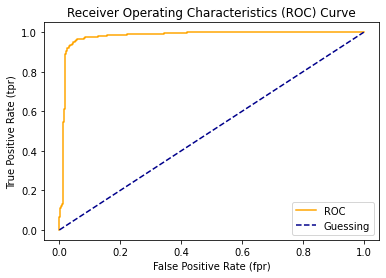

In [51]:
# create a function for plotting roc curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr): 
    """
    Plots a ROC curve given the false positive rate and true positive rate. 
    """
    
    # plot roc curve
    plt.plot(fpr,tpr, color="orange", label="ROC")
    # plot line with no predictive power 
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # customize the plot 
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)